<a id="title_ID"></a>
# Выбор целей и скачивание файлов
<br> Мы начинаем нашу работу с выбора 2 планет, которые были обнаружены телескопом Kepler

Для этого мы используем сайт NASA Exoplanet Archive
https://exoplanetarchive.ipac.caltech.edu


 </div>

Нас интересует информация о Kepler Object of Interest (KOI). Это все цели, которые были интересны и наблюдались Кеплером

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative


В таблице есть колонка "Exoplanet Archive Disposition", она показывает статус планеты на данный момент. К примеру:
- CONFIRMED - означает, что планета найдена и подтверждена другими данными
- CANDIDATE - означает, что планета кажется найдена, но подтверждения еще нет
- FALSE POSITIVE - означает, что планета была найдена, но дальнейшие данные указали на ее отсутствие. Получается ложный позитив


Сейчас нам подходят те планеты, у которых статус CONFIRMED

Для дальнейшей работы нам понадобится ID номер планеты, он находится в первой колонке KepID

Берем в качестве примера первую планету из таблицы с KepID=10797460

Заходим на портал данных Кеплера https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html
Убеждаемся, что в верхнем меню из выпадающего меню выбрано "MAST Observations by Object Name or RA/Dec" и в поиск вводим "KIC 10797460", KIC - Kepler Interesting Catalog

Портал возвращает нам целую таблицу наблюдений, справа отрисовывается звездное небо и показана наша цель.

Нас интересует колонка "target name" и "project"=Kepler. Мы видим, что "target name"=kplr010797460
Запоминаем и переходим к следующему шагу


До этого момента вы читали ноутбук как обычную запись, а теперь будет происходить магия

Запускаем следующую клетку при помощи нажатия на нее, а затем на Run в верхнем меню

In [1]:
%matplotlib notebook
from astropy.io import fits
from astropy.table import Table 
import matplotlib.pyplot as plt
from astroquery.mast import Mast
from astroquery.mast import Observations

На этом шаге у вас возникнет ошибка. Проблема в том, что ваш компьютер не знает, что такое astroquery.
Для исправления этого недостатка: открываем командную строку anaconda (anaconda prompt) и вписываем в нее: 

pip install astroquery

Нажимаем enter и после этого перезапускаем клетку с кодом.
Ошибка должна пропасть, если этого не произошло - дайте знать

Для чего вообще нужны все эти from и import?
- matplotlib notebook служит нам для того, чтобы графики можно было двигать, приближать и тд
- astropy.io fits - позволит нам читать fits файлы, в которых хранятся данные
- astropy.table Table - позволит делать таблицы
- matplotlib - для построения графиков
- astroquery.mast  Mast и astroquery.mast  Observations - позволят нам обращаться к порталу напрямую через код

In [2]:
# Теперь мы оперируем с кодом. Мы обращаемся к порталу MAST, запрашиваем у него информацию об объекте с именем
# "target name"=kplr010797460, которое мы запомнили ранее
keplerObs=Observations.query_criteria(target_name='kplr010797460', obs_collection='Kepler')
# И сразу отображаем содержимое ответа
keplerObs

dataproduct_type,calib_level,obs_collection,obs_id,target_name,s_ra,s_dec,t_min,t_max,t_exptime,wavelength_region,filters,em_min,em_max,target_classification,obs_title,t_obs_release,instrument_name,proposal_pi,proposal_id,proposal_type,project,sequence_number,provenance_name,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,intentType,obsid,objID
str10,int64,str6,str36,str13,float64,float64,float64,float64,float64,str7,str6,float64,float64,str1,str18,float64,str6,str15,str2,str6,str6,int64,str6,str112,str109,str108,str6,bool,float64,str7,str6,str6
timeseries,2,Kepler,kplr010797460_lc_Q011111111111111111,kplr010797460,291.93423000000007,48.14165,54964.01041666667,56423.50069444445,1800.0,OPTICAL,KEPLER,418400000000.0,905000000000.0,--,Kepler Key Project,nan,Kepler,William Borucki,EX,Kepler,Kepler,--,Kepler,POLYGON ICRS 291.93089998 48.14387200 291.93090026 48.13942800 291.93755974 48.13942800 291.93756002 48.14387200,http://archive.stsci.edu/missions/kepler/previews/0107/010797460/kplr010797460-2013098041711_llc_bw_large.png,http://archive.stsci.edu/missions/kepler/lightcurves/0107/010797460/kplr010797460_lc_Q011111111111111111.tar,PUBLIC,--,5885.0,science,471077,697955


In [3]:
# Мы видим, что у нас есть такой объект
# Теперь мы хотим увидеть файлы, связанные с этим объектом
keplerProds = Observations.get_product_list(keplerObs[0])
keplerProds


obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str6,str6,str10,str36,str59,str1,str110,str9,str28,str8,str1,str6,str1,str2,str44,int64,str6,str6,int64
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Data Validation summary report,C,mast:KEPLER/url/missions/kepler/dv_files/0107/010797460/kplr010797460-01-20160209194854_dvs.pdf,AUXILIARY,--,--,--,Kepler,--,EX,kplr010797460-01-20160209194854_dvs.pdf,3619400,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Data Validation summary report,C,mast:KEPLER/url/missions/kepler/dv_files/0107/010797460/kplr010797460-02-20160209194854_dvs.pdf,AUXILIARY,--,--,--,Kepler,--,EX,kplr010797460-02-20160209194854_dvs.pdf,2988622,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Data Validation time series,C,mast:KEPLER/url/missions/kepler/dv_files/0107/010797460/kplr010797460-20160128150956_dvt.fits,AUXILIARY,--,--,--,Kepler,--,EX,kplr010797460-20160128150956_dvt.fits,20905920,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Data Validation full report,C,mast:KEPLER/url/missions/kepler/dv_files/0107/010797460/kplr010797460-20160209194854_dvr.pdf,AUXILIARY,Minimum Recommended Products,--,--,Kepler,--,EX,kplr010797460-20160209194854_dvr.pdf,15714957,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Transit Crossing Event Review Team (TCERT) report,C,mast:KEPLER/url/missions/kepler/dv_files/0107/010797460/kplr010797460_q1_q17_dr25_obs_tcert.pdf,AUXILIARY,Minimum Recommended Products,--,--,Kepler,--,EX,kplr010797460_q1_q17_dr25_obs_tcert.pdf,5889664,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Preview-Full,C,mast:KEPLER/url/missions/kepler/previews/0107/010797460/kplr010797460-2013098041711_llc_bw_large.png,PREVIEW,--,--,--,Kepler,--,EX,kplr010797460-2013098041711_llc_bw_large.png,29136,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,tar file for Target Pixel Long Cadence (TPL) - all quarters,C,mast:KEPLER/url/missions/kepler/target_pixel_files/0107/010797460/kplr010797460_tpf_lc_Q011111111111111111.tar,SCIENCE,--,--,--,Kepler,--,EX,kplr010797460_tpf_lc_Q011111111111111111.tar,22620160,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,tar file for Lightcurves Long Cadence (CLC) - all quarters,C,mast:KEPLER/url/missions/kepler/lightcurves/0107/010797460/kplr010797460_lc_Q011111111111111111.tar,SCIENCE,Minimum Recommended Products,--,--,Kepler,--,EX,kplr010797460_lc_Q011111111111111111.tar,7454720,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Lightcurve Long Cadence (CLC) - Q1,C,mast:KEPLER/url/missions/kepler/lightcurves/0107/010797460/kplr010797460-2009166043257_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr010797460-2009166043257_llc.fits,192960,471077,PUBLIC,2


Мы видим целую кучу файлов (42 как написано вверху таблицы), можно заметить, что у них разные расширения: .pdf, .fits, .gz. Разные "product type" - science/auxiliary и тд
Нас интересуют файлы с расширением .fits, поскольку в них хранится информация о блеске звезды.

Поэтому, отфильтруем данные по признаку содержания ".fits"


In [4]:
yourProd = Observations.filter_products(keplerProds, extension='.fits', 
                                        mrp_only=False)
yourProd

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str6,str6,str10,str36,str59,str1,str110,str9,str28,str8,str1,str6,str1,str2,str44,int64,str6,str6,int64
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Data Validation time series,C,mast:KEPLER/url/missions/kepler/dv_files/0107/010797460/kplr010797460-20160128150956_dvt.fits,AUXILIARY,--,--,--,Kepler,--,EX,kplr010797460-20160128150956_dvt.fits,20905920,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Lightcurve Long Cadence (CLC) - Q1,C,mast:KEPLER/url/missions/kepler/lightcurves/0107/010797460/kplr010797460-2009166043257_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr010797460-2009166043257_llc.fits,192960,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Lightcurve Long Cadence (CLC) - Q2,C,mast:KEPLER/url/missions/kepler/lightcurves/0107/010797460/kplr010797460-2009259160929_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr010797460-2009259160929_llc.fits,466560,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Lightcurve Long Cadence (CLC) - Q3,C,mast:KEPLER/url/missions/kepler/lightcurves/0107/010797460/kplr010797460-2009350155506_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr010797460-2009350155506_llc.fits,466560,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Lightcurve Long Cadence (CLC) - Q4,C,mast:KEPLER/url/missions/kepler/lightcurves/0107/010797460/kplr010797460-2010078095331_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr010797460-2010078095331_llc.fits,469440,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Lightcurve Long Cadence (CLC) - Q5,C,mast:KEPLER/url/missions/kepler/lightcurves/0107/010797460/kplr010797460-2010174085026_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr010797460-2010174085026_llc.fits,492480,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Lightcurve Long Cadence (CLC) - Q6,C,mast:KEPLER/url/missions/kepler/lightcurves/0107/010797460/kplr010797460-2010265121752_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr010797460-2010265121752_llc.fits,469440,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Lightcurve Long Cadence (CLC) - Q7,C,mast:KEPLER/url/missions/kepler/lightcurves/0107/010797460/kplr010797460-2010355172524_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr010797460-2010355172524_llc.fits,466560,471077,PUBLIC,2
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Lightcurve Long Cadence (CLC) - Q8,C,mast:KEPLER/url/missions/kepler/lightcurves/0107/010797460/kplr010797460-2011073133259_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr010797460-2011073133259_llc.fits,357120,471077,PUBLIC,2


У нас осталось всего 18 записей в таблице. Теперь обратим внимание на "productFilename". 

К примеру kplr010797460-2009166043257_llc.fits - что означает это имя? 
- kplr = Kepler
- 010797460 = Kepler ID номер
- 2009166043257 = 2009 год, 166 день, время 04:32:57
- llc = long cadence - частота считывания итоговых данных (short - 1 минута, long - 30 минут)


In [5]:
# Возьмем в качестве первого примера данных kplr010797460-2009166043257_llc.fits
yourProd = Observations.filter_products(keplerProds, extension='kplr010797460-2009166043257_llc.fits', 
                                        mrp_only=False)
yourProd

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str6,str6,str10,str36,str59,str1,str110,str9,str28,str8,str1,str6,str1,str2,str44,int64,str6,str6,int64
471077,Kepler,timeseries,kplr010797460_lc_Q011111111111111111,Lightcurve Long Cadence (CLC) - Q1,C,mast:KEPLER/url/missions/kepler/lightcurves/0107/010797460/kplr010797460-2009166043257_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr010797460-2009166043257_llc.fits,192960,471077,PUBLIC,2


In [6]:
# Теперь в переменной yourProd лежит путь к наблюдению kplr010797460-2009166043257_llc.fits
# Чтобы скачать наблюдение на компьютер необходимо эту ячейку: 
Observations.download_products(yourProd, mrp_only = False, cache = False) 

Local Path,Status,Message,URL
str95,str8,object,object
./mastDownload/Kepler/kplr010797460_lc_Q011111111111111111/kplr010797460-2009166043257_llc.fits,COMPLETE,None,None


Файл скачается в папку, в которой находится данный ноутбук. 

Код сам создаст директорию mastDownload, с директорией Kepler в ней, в которой будет директория с именем файла. Весь путьк файлу виден выше: ./mastDownload/Kepler/kplr010797460_lc_Q011111111111111111/kplr010797460-2009166043257_llc.fits 

В дальнейшем, если вы будете скачивать другие файлы, то будут создаваться другие директории, в той же основной /mastDownload/Kepler

<a id="title_ID"></a>
# Работа с fits файлами
<br> После того, как мы скачали файлы их надо открыть и прочитать. Чем мы и займемся


 </div>

In [8]:
filename = "./mastDownload/Kepler/kplr010797460_lc_Q011111111111111111/kplr010797460-2009166043257_llc.fits"
fits.info(filename)

Filename: ./mastDownload/Kepler/kplr010797460_lc_Q011111111111111111/kplr010797460-2009166043257_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   1639R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (5, 4)   int32   


Мы получили информацию о fits файле

Немного общей информации: мы будем использовать сокращение HDU-Header Data Unit- блок данных заголовка; 
файл FITS состоит из заголовков или блоков данных, которые содержат информацию, данные и метаданные, относящиеся к файлу. Первый HDU называется основным, а все, что следует за ним, считается расширением.

- *No. 0 (PRIMARY): 
Этот HDU содержит метаданные, относящиеся ко всему файлу.
- *No. 1 (LIGHTCURVE ): 
Этот HDU содержит двоичную таблицу, в которой хранятся такие данные, как измерения потока света и время. Мы извлечем информацию отсюда, когда определим параметры для графика кривой блеска.
- *No. 2 (APERTURE): 
Этот HDU содержит расширение изображения с данными, собранными из апертуры. Мы также можем использовать это для отображения графика битовой маски, который визуально представляет оптимальную апертуру, используемую для создания столбца SAP_FLUX в HDU1.

Допустим мы хотим посмотреть информацию, которая хранится в хедере HDU LIGHTCURVE. Вообще читать то, что написано в хедерах полезно для понимания данных, а еще просто интересно

Чтобы это сделать мы должны использовать команду из следующей ячейки

In [9]:
with fits.open(filename) as hdulist: 
    header1 = hdulist[1].header
# hdulist[1] - указание на HDU LIGHTCURVE, допустим, если бы мы хотели прочитать APERTURE, то надо было бы сделать
# hdulist[2]

In [10]:
header1

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                 1639 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

Мы можем заметить, что XTENSION= 'BINTABLE' бинарная таблица, это то, что мы и будем отображать, зависимость блеска (потока света) от времении.

Допустим, мы хотим посмотреть на данные в виде таблицы:

In [11]:
with fits.open(filename) as hdulist:
    binaryext = hdulist[1].data

binarytable = Table(binaryext)

# Тут имеет смысл уменьшить свои аппетиты, поскольку всего строк 1639 смотреть на все совсем неудобно, возьмем первые 10
binarytable[1:10]

TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
float64,float32,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
131.53249777646124,0.0010702565,1106,8893.737,4.4333744,656.8249,0.4073189,11292.761,5.654041,0,nan,nan,nan,nan,963.4343318810736,0.0007717967,845.9193228050201,0.0008206715,-0.009173585,-0.013551758
131.55293210056698,0.0010709806,1107,8885.391,4.432857,654.5247,0.40746492,11281.872,5.649789,8192,nan,nan,nan,nan,963.4365364139863,0.00077101024,845.9176224439398,0.0008190045,-0.009321798,-0.0136304395
131.57336632466468,0.0010717047,1108,8899.486,4.433579,654.29065,0.4083789,11298.02,5.6570654,0,nan,nan,nan,nan,963.4322350949674,0.0007707953,845.919878118391,0.0008197346,-0.009337413,-0.013619965
131.5938006487704,0.0010724288,1109,8887.264,4.4329424,644.9961,0.4084401,11284.712,5.6573076,0,nan,nan,nan,nan,963.4322296008567,0.0007718426,845.92056352124,0.00082102814,-0.009300201,-0.01318398
131.6142350727605,0.0010731528,1110,8893.904,4.433287,637.5801,0.40831438,11292.368,5.657449,0,nan,nan,nan,nan,963.431424120282,0.00077155285,845.9190864475684,0.00082042755,-0.009194484,-0.013219508
131.63466929686547,0.0010738769,1111,8897.466,4.4338064,636.6695,0.40779257,11296.4795,5.6591225,0,nan,nan,nan,nan,963.4325605064724,0.00077164295,845.9201226018304,0.00082074077,-0.009163128,-0.013154156
131.6551036207311,0.0010746007,1112,8890.9375,4.433197,674.1036,0.40846556,11288.383,5.6551576,0,nan,nan,nan,nan,963.4323311735104,0.0007720062,845.9204315583625,0.00082122395,-0.009009675,-0.013044867
131.67553804472118,0.0010753247,1113,8890.608,4.43351,662.152,0.4070301,11288.016,5.65405,8192,nan,nan,nan,nan,963.432972722806,0.0007720468,845.9209675390296,0.0008213362,-0.009087725,-0.013034637
131.6959723685868,0.0010760486,1114,8901.502,4.433689,670.4986,0.4080671,11302.501,5.652858,0,nan,nan,nan,nan,963.4335495469238,0.0007702418,845.9203045932677,0.0008193253,-0.009016114,-0.01280143


<a id="title_ID"></a>
# Визуализация
<br> Теперь, когда мы умеем читать fits файлы, пришло время визуализировать кривые блеска!


 </div>

Kepler существует в собственных координатах времени BKJD (барицентрические юлианские дни Kepler) и нам необходимо преобразовать их во время в юлианских днях (BJD барицентрический юлианский день; это юлианская дата, которая была скорректирована с учетом различий в положении Земли относительно Барицентра Солнечной системы - центра масс Солнечной системы) - общему стадарту в астрономическом мире.
 
В хедере расширения кривой блеска есть 'BJDREFI' и 'BJDREFF' это сдвиг по времени как целое число и число с плавающей точкой. Их необходимо сохранить в 2 переменные.

Помимо этого надо сохранить время 'time' (отсчеты времени), и конечно же данные блеска

Данные блеска или светового потока тоже хранятся в хедере, но есть два варианта:
- 'SAP_FLUX' - Simple Aperture Photometry flux - поток после суммирования откалиброванных пикселей в пределах оптимальной апертуры
- 'PDCSAP_FLUX' - Pre-search Data Conditioned Simple Aperture Photometry flux - это значения потока, номинально скорректированные с учетом инструментальных вариаций

Сохраним оба набора значений потока и посмотрим на их визуализацию


Чтобы сделать коорекцию времени необходимо добавить времена 'BJDREFI' и 'BJDREFF' к данным времени.



In [12]:
with fits.open(filename, mode="readonly") as hdulist:
   # C открытым фитсом сохраняем 'BJDREFI' и 'BJDREFF'
    bjdrefi = hdulist[1].header['BJDREFI'] 
    bjdreff = hdulist[1].header['BJDREFF']

    # сохраняем время и 2 набора блеска
    times = hdulist[1].data['time'] 
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

<IPython.core.display.Javascript object>


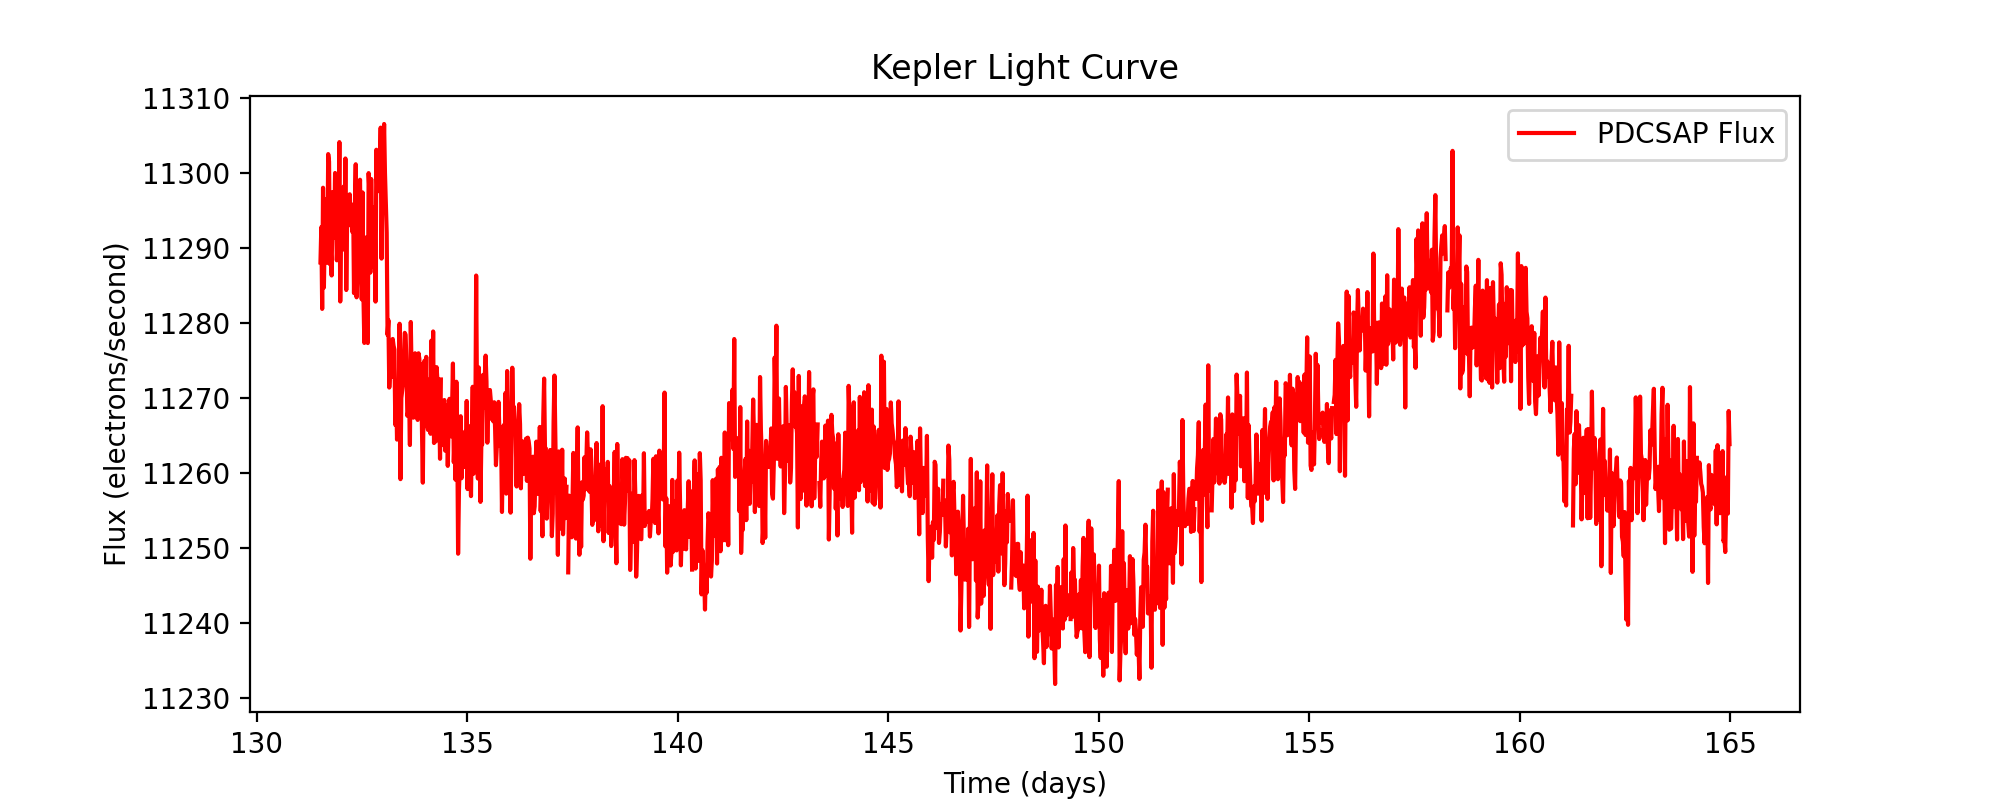

In [17]:
# Переводим BKJD в BJD
bjds = times + bjdrefi + bjdreff 

# указываем какого размера хотим график
plt.figure(figsize=(10,4))

# Отрисовываем график: блеск в зависимости от времени, '-k' и '-r' - стиль и цвет кривых, label - ярлык для кривых
#plt.plot(bjds, sap_fluxes, '-k', label='SAP Flux') 
#plt.plot(bjds, pdcsap_fluxes, '-r', label='PDCSAP Flux')
#plt.plot(times, pdcsap_fluxes, '-r', label='PDCSAP Flux')

plt.title('Kepler Light Curve')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Flux (electrons/second)')
plt.show()

<a id="title_ID"></a>
# Самостоятельная работа
<br> 


 </div>
 
Давайте теперь проделаем все необходимые шаги, чтобы построить кривую блеска для звезды с Kepler ID= 11446443
В этот раз нам будет доступно два результата поиска по объекту (keplerObs).
Название наблюдений отличаются и в них мы можем заметить уже известную нам аббревиатуру: lc или sc. 
Попробуем в этот раз построить sc (short cadence)

Теперь, когда вы знаете как по разному могут выглядеть кривые блеска предлагаю проделать все предыдущие шаги и посмотреть на несколько интересных случаев:

Кандидат в экзопланеты, который ждет дополнительного подтверждения
Candidate: 
1. KepID
3115833

2. KepID
3453214 (short)

Ошибочный позитив

False Positive:
1. KepID
3554600

2. KepID
3734868 (short)

И пара интересных случаев подтвержденных экзопланет 

Confirmed:

1.KepID
3351888

2.KepID
3832474

Дополнительно давайте посмотрим на несколько последовательных замеров блеска звезды, до этого мы выбирали всего один fits файл, давайте загрузим два и отрисуем сразу обе кривые.

In [40]:
filename = "./mastDownload/Kepler/kplr003832474_lc_Q011111111111111111/kplr003832474-2009166043257_llc.fits"
fits.info(filename)

Filename: ./mastDownload/Kepler/kplr003832474_lc_Q011111111111111111/kplr003832474-2009166043257_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   1639R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (5, 4)   int32   


In [41]:
with fits.open(filename, mode="readonly") as hdulist:
   # C открытым фитсом сохраняем 'BJDREFI' и 'BJDREFF'
    bjdrefi = hdulist[1].header['BJDREFI'] 
    bjdreff = hdulist[1].header['BJDREFF']

    # сохраняем время и 2 набора блеска
    times = hdulist[1].data['time'] 
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

<IPython.core.display.Javascript object>


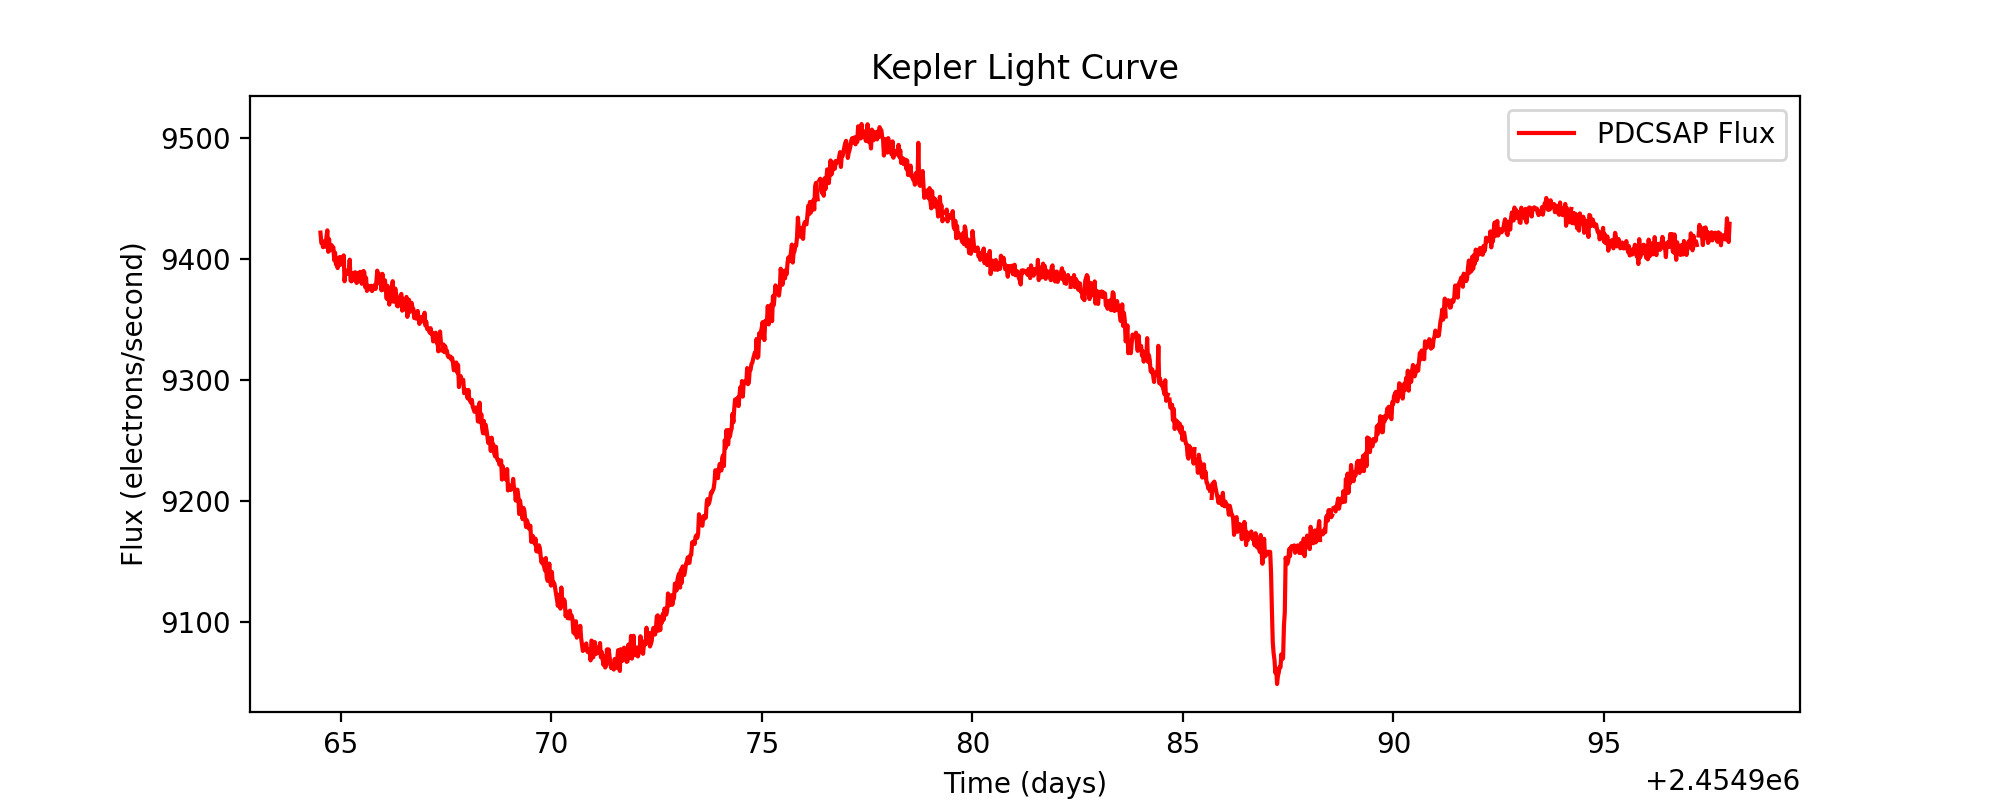

In [42]:
# Переводим BKJD в BJD
bjds = times + bjdrefi + bjdreff 

# указываем какого размера хотим график
plt.figure(figsize=(10,4))

# Отрисовываем график: блеск в зависимости от времени, '-k' и '-r' - стиль и цвет кривых, label - ярлык для кривых
#plt.plot(bjds, sap_fluxes, '-k', label='SAP Flux') 
plt.plot(bjds, pdcsap_fluxes, '-r', label='PDCSAP Flux')
#plt.plot(times, pdcsap_fluxes, '-r', label='PDCSAP Flux')

plt.title('Kepler Light Curve')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Flux (electrons/second)')
plt.show()